In [1]:
# nhập thư viện
import numpy as np
import pandas as pd

In [2]:
# tạo hàm lấy dữ liệu
def loadCsv(filename) -> pd.DataFrame:
    '''Code here'''

In [3]:
# tạo hàm biến đổi cột định tính, dùng phương pháp one hot
def transform(data, columns_trans): # data dạng dataframe, data_trans là cột cần biến đổi --> dạng Series, nhiều cột cần biến đổi thì bỏ vào list
    for i in columns_trans:
        unique = data[i].unique() + '-' + i # trả lại mảng
        # tạo ma trận 0
        matrix_0 = np.zeros((len(data), len(unique)), dtype = int)
        frame_0 = pd.DataFrame(matrix_0, columns = unique)
        for index, value in enumerate(data[i]):
            frame_0.at[index, value + '-' + i] = 1
        data[unique] = frame_0
    return data # trả lại data truyền vào nhưng đã bị biến đổi

In [4]:
# tạo hàm scale dữ liệu về [0,1] (min max scaler)
def scale_data(data, columns_scale): # columns_scale là cột cần scale, nếu nhiều bỏ vào list ['a', 'b']
    for i in columns_scale:  
        _max = data[i].max()
        _min = data[i].min()
        '''Code here'''
        min_max_scaller = lambda x: round(, 3)
        data[i] = data[i].apply(min_max_scaller)
    return data # --> trả về frame

In [5]:
# hàm tính khoảng cách Cosine 
def cosine_distance(train_X, test_X): # cả 2 đều dạng mảng
    dict_distance = dict()
    for index, value in enumerate(test_X, start = 1):
        for j in train_X:
            result = np.sqrt(np.sum((j - value)**2))
            if index not in dict_distance:
                dict_distance[index] = [result]
            else:
                dict_distance[index].append(result)
    return dict_distance # {1: [6.0, 5.0], 2: [4.6, 3.1]}

In [6]:
# hàm gán kết quả theo k
def pred_test(k, train_X, test_X, train_y): # train_X, test_X là mảng, train_y là Series
    lst_predict = list()
    dict_distance = cosine_distance(train_X, test_X)
    train_y = train_y.to_frame(name = 'target').reset_index(drop = True) # train_y là frame
    frame_concat = pd.concat([pd.DataFrame(dict_distance), train_y], axis = 1)
    for i in range(1, len(dict_distance) + 1):
        sort_distance = frame_concat[[i, 'target']].sort_values(by = i, ascending = True)[:k] # sắp xếp và lấy k
        target_predict = sort_distance['target'].value_counts(ascending = False).index[0]
        lst_predict.append([i, target_predict])
    return lst_predict

In [7]:
## Demo qua drug200

In [8]:
data = loadCsv('drug200.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


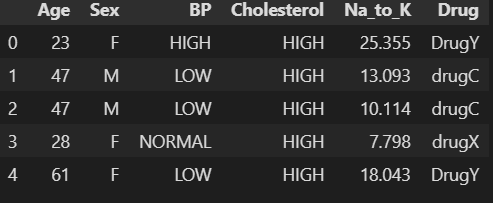

In [9]:
df = transform(data, ['Sex', 'BP', 'Cholesterol']).drop(['Sex', 'BP', 'Cholesterol'], axis = 1)
df

,Age,Na_to_K,Drug,F-Sex,M-Sex,HIGH-BP,LOW-BP,NORMAL-BP,HIGH-Cholesterol,NORMAL-Cholesterol
0,23,25.355,DrugY,1,0,1,0,0,1,0
1,47,13.093,drugC,0,1,0,1,0,1,0
2,47,10.114,drugC,0,1,0,1,0,1,0
3,28,7.798,drugX,1,0,0,0,1,1,0
4,61,18.043,DrugY,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,drugC,1,0,0,1,0,1,0
196,16,12.006,drugC,0,1,0,1,0,1,0
197,52,9.894,drugX,0,1,0,0,1,1,0
198,23,14.020,drugX,0,1,0,0,1,0,1


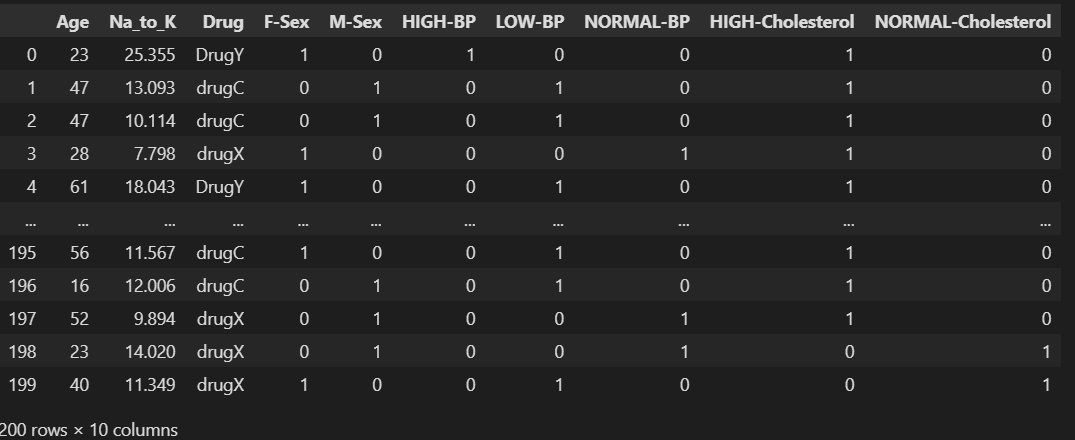

In [10]:
scale_data(df, ['Age', 'Na_to_K']) # không cần gán biến vì nó trả về data đã truyền vào nhưng đã bị scale
df

,Age,Na_to_K,Drug,F-Sex,M-Sex,HIGH-BP,LOW-BP,NORMAL-BP,HIGH-Cholesterol,NORMAL-Cholesterol
0,0.136,0.597,DrugY,1,0,1,0,0,1,0
1,0.542,0.213,drugC,0,1,0,1,0,1,0
2,0.542,0.120,drugC,0,1,0,1,0,1,0
3,0.220,0.048,drugX,1,0,0,0,1,1,0
4,0.780,0.368,DrugY,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
195,0.695,0.166,drugC,1,0,0,1,0,1,0
196,0.017,0.179,drugC,0,1,0,1,0,1,0
197,0.627,0.113,drugX,0,1,0,0,1,1,0
198,0.136,0.242,drugX,0,1,0,0,1,0,1


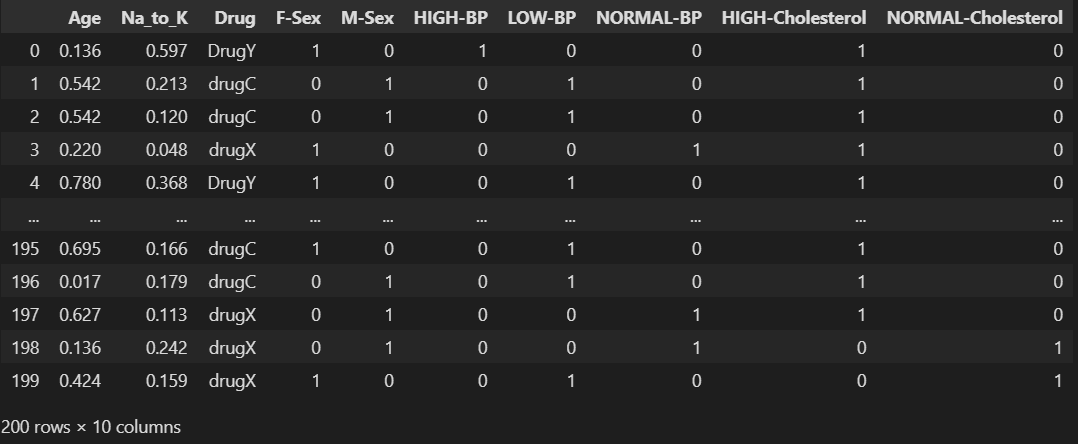

In [11]:
# tạo data_X và target
data_X = df.drop(['Drug'], axis = 1).values
data_y = df['Drug']
print(data_X)
print(data_y)

[[0.136 0.597 1.    ... 0.    1.    0.   ]
 [0.542 0.213 0.    ... 0.    1.    0.   ]
 [0.542 0.12  0.    ... 0.    1.    0.   ]
 ...
 [0.627 0.113 0.    ... 1.    1.    0.   ]
 [0.136 0.242 0.    ... 1.    0.    1.   ]
 [0.424 0.159 1.    ... 0.    0.    1.   ]]
0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object


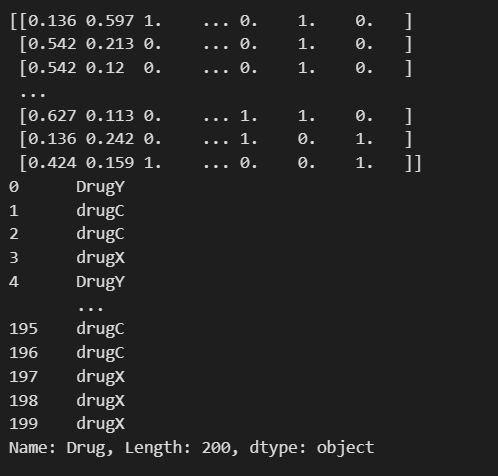

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size = 0.2, random_state = 0)

In [13]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)
print(len(X_train), len(X_test), len(y_train), len(y_test))
print(type(y_train))

[[0.458 0.462 1.    ... 0.    1.    0.   ]
 [0.237 0.206 0.    ... 0.    1.    0.   ]
 [0.271 0.754 0.    ... 0.    1.    0.   ]
 ...
 [0.424 0.12  1.    ... 1.    1.    0.   ]
 [0.898 0.126 0.    ... 0.    1.    0.   ]
 [0.407 0.343 1.    ... 1.    0.    1.   ]]
[[0.136 0.032 0.    1.    0.    1.    0.    1.    0.   ]
 [0.22  0.207 1.    0.    0.    0.    1.    1.    0.   ]
 [0.458 0.43  0.    1.    0.    1.    0.    1.    0.   ]
 [0.085 0.918 0.    1.    1.    0.    0.    0.    1.   ]
 [0.169 0.398 0.    1.    0.    0.    1.    1.    0.   ]
 [0.085 0.169 1.    0.    0.    1.    0.    0.    1.   ]
 [0.119 0.073 1.    0.    0.    0.    1.    1.    0.   ]
 [0.373 0.179 1.    0.    0.    1.    0.    0.    1.   ]
 [0.475 0.285 0.    1.    0.    1.    0.    1.    0.   ]
 [0.678 0.031 0.    1.    0.    0.    1.    0.    1.   ]
 [0.153 0.1   0.    1.    1.    0.    0.    0.    1.   ]
 [0.068 0.616 1.    0.    1.    0.    0.    0.    1.   ]
 [0.119 0.518 1.    0.    1.    0.    0.    0.    1.

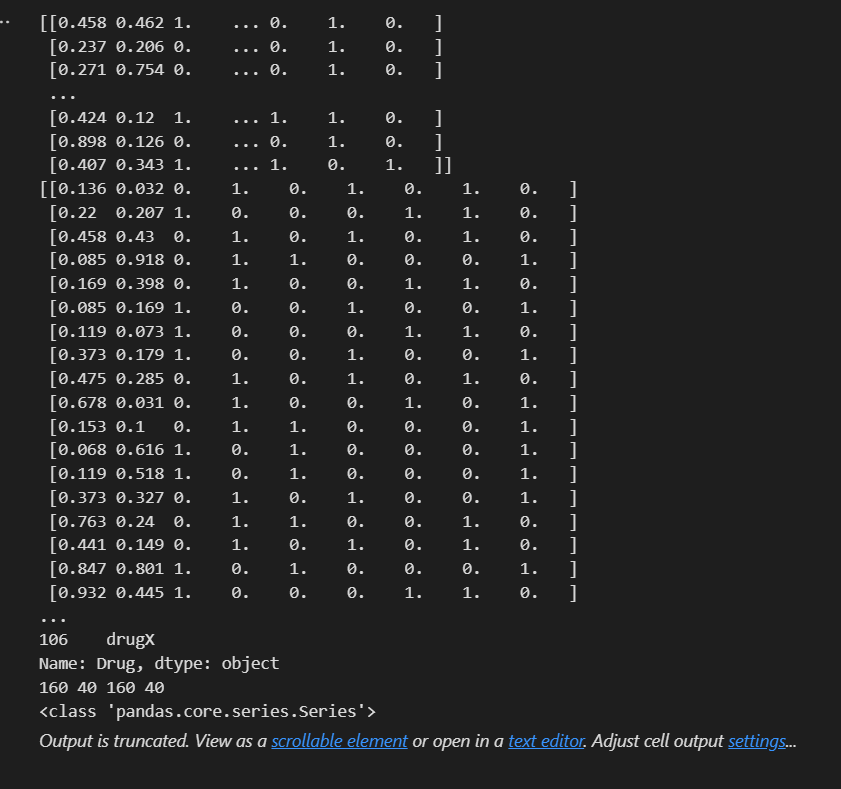

In [14]:
test_pred = pred_test(6, X_train, X_test, y_train)
df_test_pred = pd.DataFrame(test_pred).drop([0], axis = 1)
df_test_pred.index = range(1, len(test_pred) + 1)
df_test_pred.columns = ['Predict']

In [15]:
df_actual = pd.DataFrame(y_test)
df_actual.index = range(1, len(y_test) + 1)
df_actual.columns = ['Actual']

In [16]:
pd.concat([df_test_pred, df_actual], axis = 1)

,Predict,Actual
1,drugC,drugC
2,drugX,drugX
3,DrugY,DrugY
4,DrugY,DrugY
5,DrugY,DrugY
6,DrugY,drugX
7,drugX,drugX
8,drugX,drugX
9,DrugY,DrugY
10,drugX,drugX


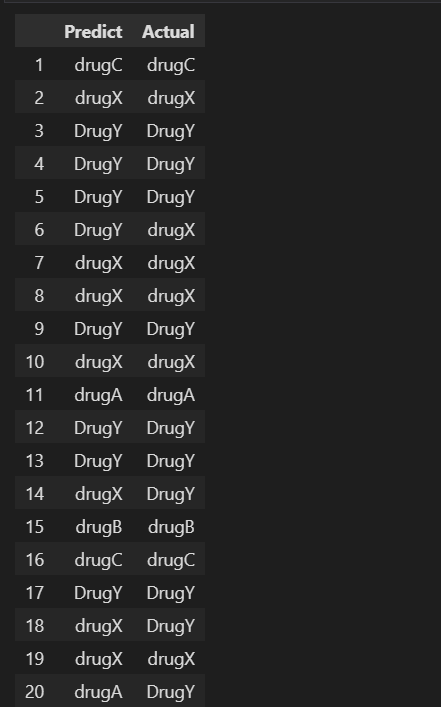